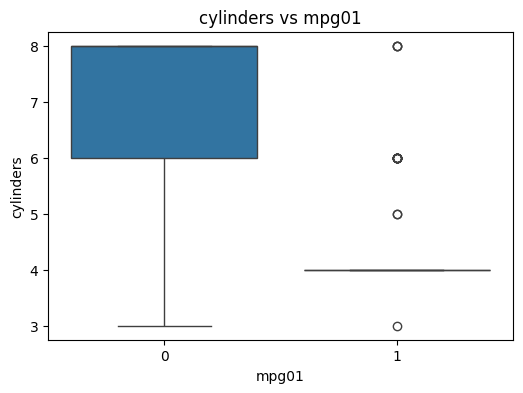

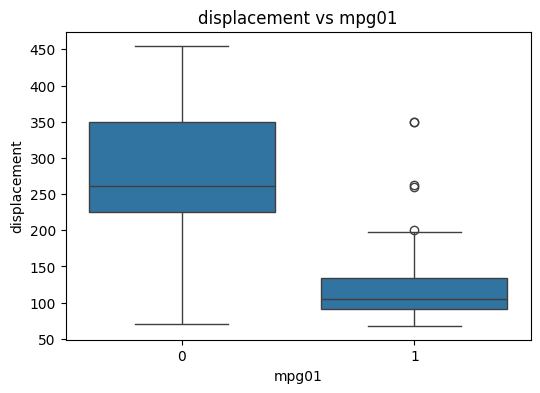

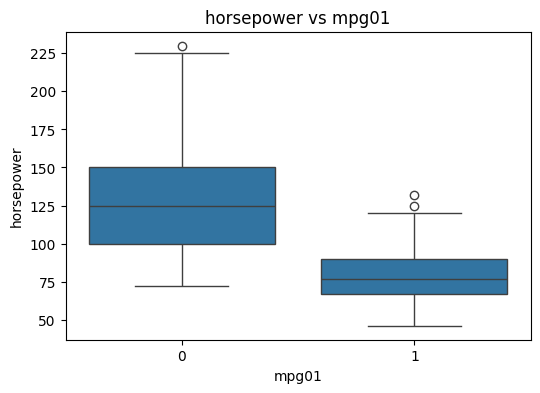

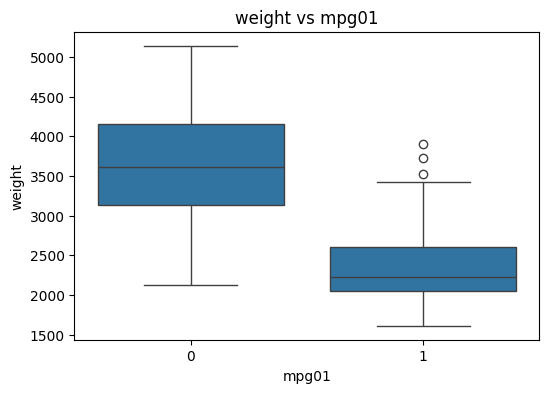

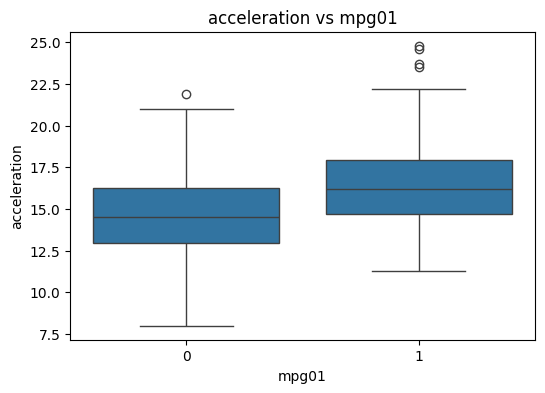

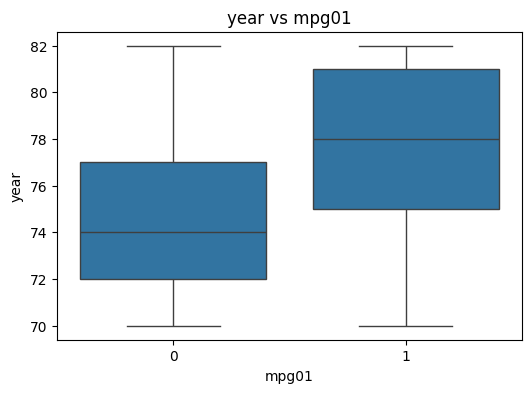

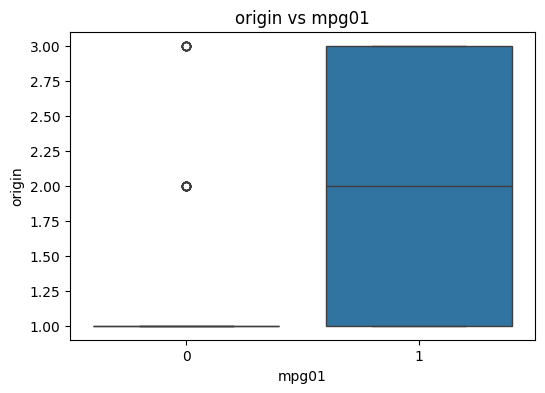

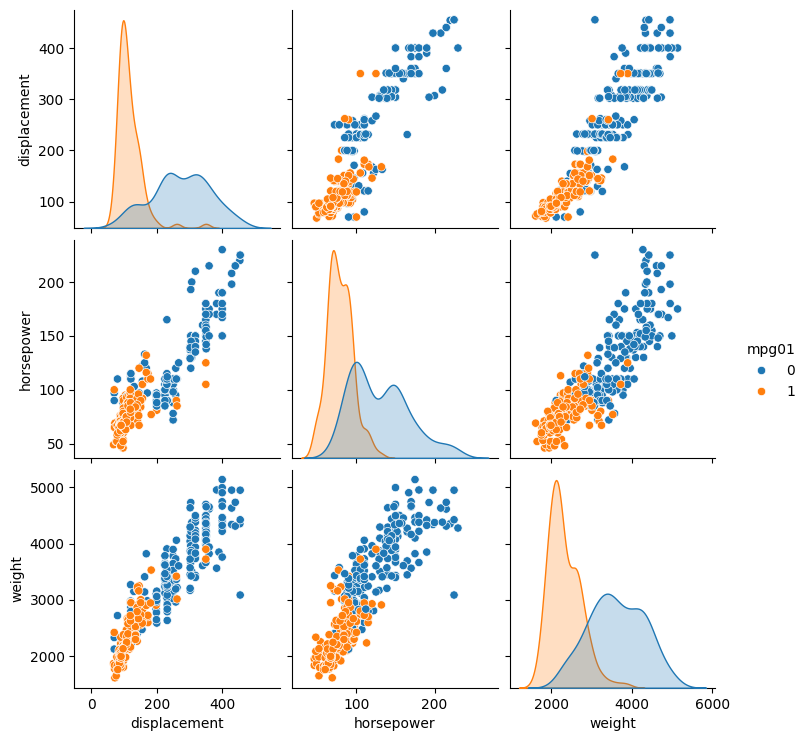

Optimization terminated successfully.
         Current function value: 0.248079
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  mpg01   No. Observations:                  277
Model:                          Logit   Df Residuals:                      272
Method:                           MLE   Df Model:                            4
Date:                Wed, 26 Nov 2025   Pseudo R-squ.:                  0.6418
Time:                        12:25:09   Log-Likelihood:                -68.718
converged:                       True   LL-Null:                       -191.86
Covariance Type:            nonrobust   LLR p-value:                 4.129e-52
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           11.3520      1.988      5.710      0.000       7.455      15.249
cylinders        0.1273

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load Auto dataset directly from URL
url = "https://raw.githubusercontent.com/selva86/datasets/master/Auto.csv"
Auto = pd.read_csv(url)

# ===============================
# Part (a) - Create mpg01
# ===============================
median_mpg = Auto['mpg'].median()
Auto['mpg01'] = (Auto['mpg'] > median_mpg).astype(int)

# ===============================
# Part (b) - Explore data
# ===============================
features = ['cylinders','displacement','horsepower','weight','acceleration','year','origin']

for f in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='mpg01', y=f, data=Auto)
    plt.title(f'{f} vs mpg01')
    plt.show()

sns.pairplot(Auto, vars=['displacement','horsepower','weight'], hue='mpg01')
plt.show()

# ===============================
# Part (c) - Split data manually
# ===============================
np.random.seed(42)
mask = np.random.rand(len(Auto)) < 0.7
train = Auto[mask]
test = Auto[~mask]

X_train = train[['cylinders','displacement','horsepower','weight']]
y_train = train['mpg01']
X_test = test[['cylinders','displacement','horsepower','weight']]
y_test = test['mpg01']

# ===============================
# Part (f) - Logistic Regression using statsmodels
# ===============================
X_train_sm = sm.add_constant(X_train)
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()
print(result.summary())

X_test_sm = sm.add_constant(X_test)
y_pred_prob = result.predict(X_test_sm)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = (y_pred == y_test).mean()
print("Logistic Regression Test Accuracy:", accuracy)
